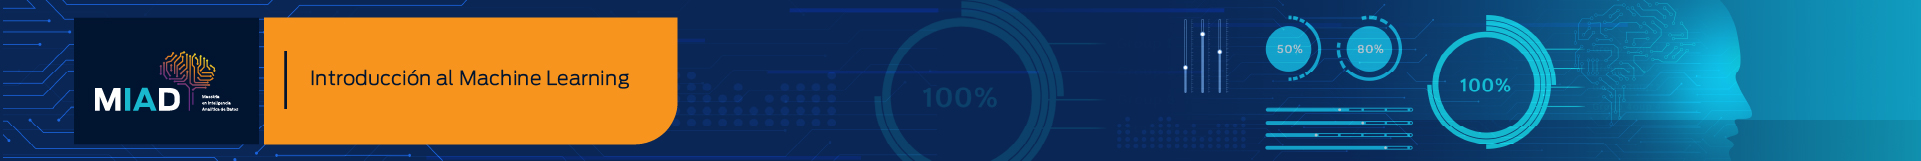

# Introducción al Machine Learning - Semana 3
## Caso: Implementación de modelos de clasificación lineales

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo LDA: Se estima el modelo usando LDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo QDA: Se estima el modelo usando QDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo NBC: Se estima el modelo usando NBC, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de regresión logística: Se estima el modelo usando regresión logística, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://drive.google.com/drive/folders/1YuWR657GDARSMPkUCVFNd2a5mX5zL16A?usp=sharing 

In [3]:
#  Cargar librerías
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score

In [4]:
#Cargar datos
df = pd.read_csv("Smarket.csv", sep=",")
df

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,Up
...,...,...,...,...,...,...,...,...,...
1245,1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,Up
1246,1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,Down
1247,1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,Up
1248,1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,Down


In [5]:
# Se eliminar filas con valores faltantes en caso de haber y la variable que indific acantidad de registros (Unnamed: 0)
df.dropna(subset=['Direction'], inplace=True)
df.reset_index(drop=True, inplace=True)
ytotal = df['Direction']
Xtotal = df.drop(columns=['Direction', 'Unnamed: 0'])

In [6]:
#División de train y test con 33% en test
XTrain, XTest, yTrain, yTest = train_test_split(Xtotal, ytotal, test_size=0.33, random_state=0)

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [8]:
eda = df.copy()

In [9]:
eda = eda.drop(columns=['Unnamed: 0'])


In [10]:
eda.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Direction'], dtype='object')

In [11]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Direction  1250 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 78.2+ KB


In [12]:
eda.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470


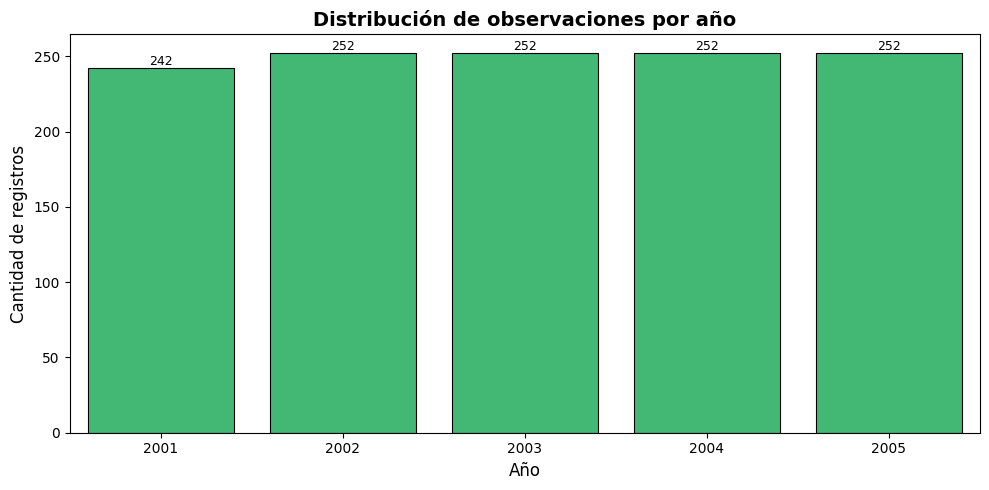

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="Year", data=eda, color="#2ecc71", edgecolor="black", linewidth=0.8)
ax.set_title("Distribución de observaciones por año", fontsize=14, fontweight="bold")
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Cantidad de registros", fontsize=12)
ax.tick_params(axis="both", labelsize=10)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

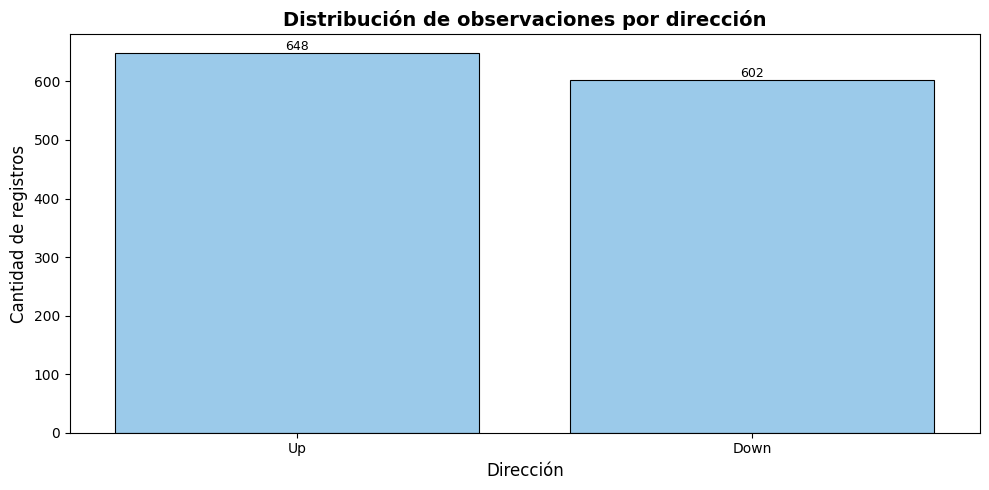

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="Direction", data=eda, color="#8ECDF7", edgecolor="black", linewidth=0.8)
ax.set_title("Distribución de observaciones por dirección", fontsize=14, fontweight="bold")
ax.set_xlabel("Dirección", fontsize=12)
ax.set_ylabel("Cantidad de registros", fontsize=12)
ax.tick_params(axis="both", labelsize=10)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

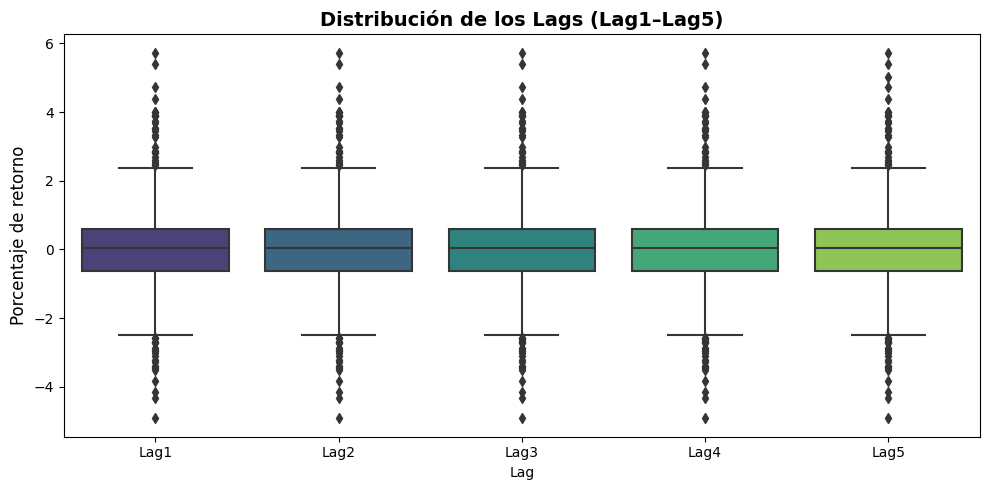

In [15]:
# Boxplot múltiple: Lag1 a Lag5
lags = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']
eda_lags = eda[lags].melt(var_name='Lag', value_name='Valor')

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=eda_lags, x='Lag', y='Valor', palette='viridis')
ax.set_title('Distribución de los Lags (Lag1–Lag5)', fontsize=14, fontweight='bold')
ax.set_ylabel('Porcentaje de retorno', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

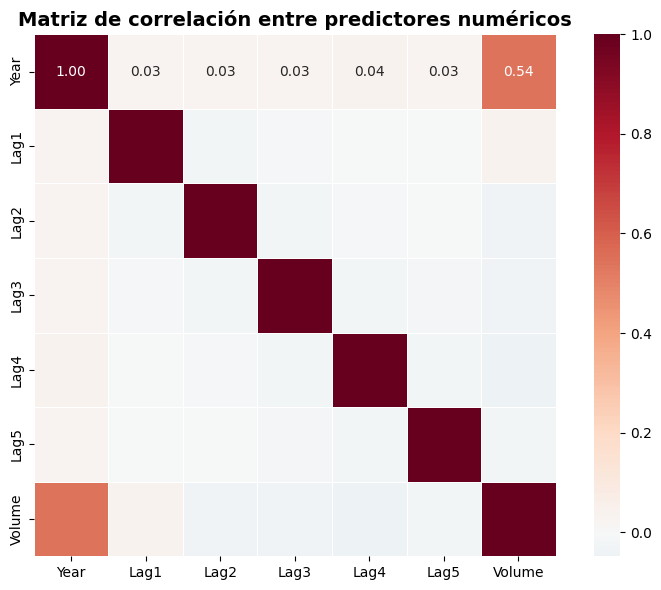

In [16]:
# Correlograma: matriz de correlación + heatmap (multicolinealidad)
cols_num = ['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
corr_mat = eda[cols_num].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax)
ax.set_title('Matriz de correlación entre predictores numéricos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

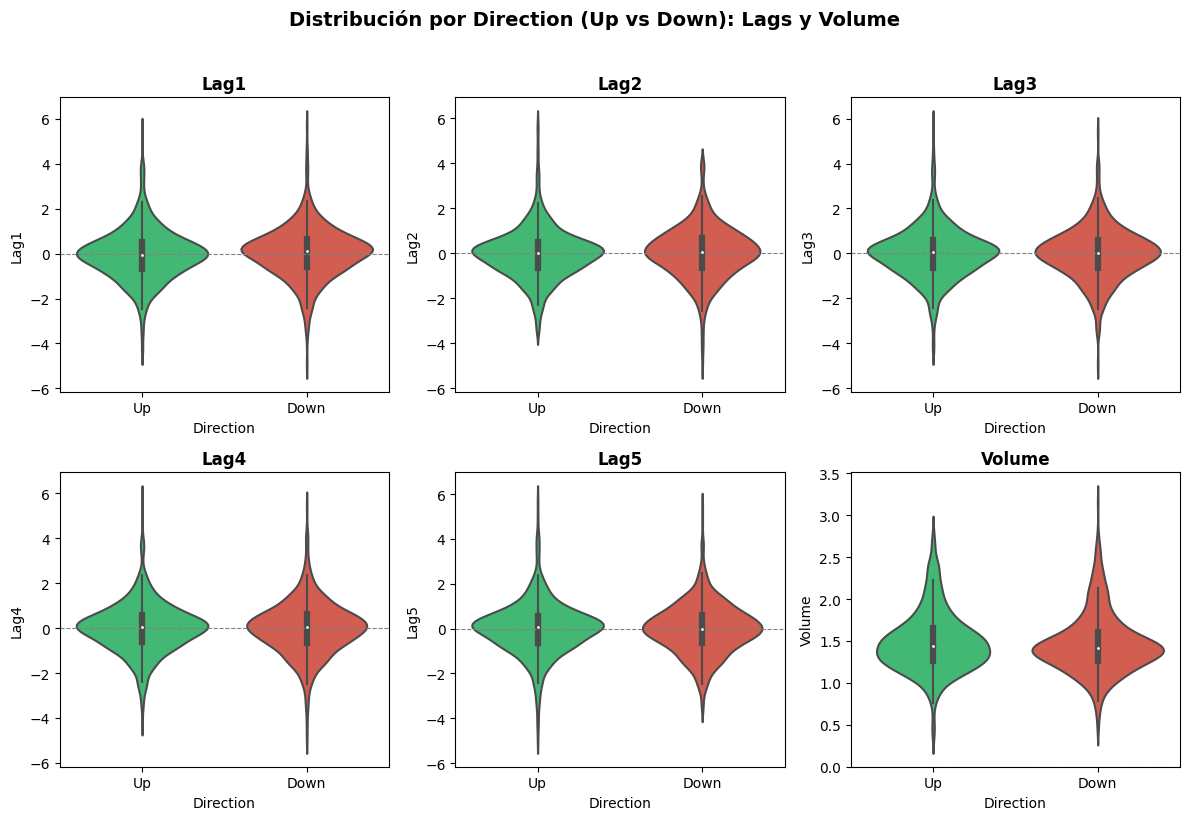

In [17]:
# Gráficos de violín: Lag1–Lag5 y Volume por Direction (discriminación Up vs Down)
vars_plot = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
n_vars = len(vars_plot)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(vars_plot):
    sns.violinplot(data=eda, x='Direction', y=var, ax=axes[i], palette=['#2ecc71', '#e74c3c'])
    axes[i].set_title(var, fontweight='bold')
    axes[i].set_xlabel('Direction')
    axes[i].set_ylabel(var)
    axes[i].axhline(0, color='gray', linestyle='--', linewidth=0.8)

plt.suptitle('Distribución por Direction (Up vs Down): Lags y Volume', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#### Análisis y conclusiones del EDA (punto 1)

**Procedimiento realizado:** Se llevó a cabo un análisis exploratorio sobre el set (Smarket): revisión de forma y tipos, estadísticas descriptivas, distribución de la variable respuesta (Direction) y del año (Year), boxplots de los Lags, matriz de correlación con heatmap y gráficos de violín de Lag1–Lag5 y Volume por Direction.

**Hallazgos principales:**

1. **Datos y variable respuesta:** El conjunto tiene 1250 observaciones sin nulos en las columnas usadas. La variable **Direction** (Up/Down) está relativamente equilibrada; un ligero desbalance no invalida el uso de los modelos de clasificación considerados.

2. **Distribución temporal:** Las observaciones están repartidas por años (p. ej. 2001–2005). La distribución por **Year** es razonablemente uniforme, lo que evita sesgos temporales marcados en train/test si la partición es aleatoria.

3. **Predictores numéricos (Lags y Volume):** Los **Lags** (retornos pasados) presentan distribuciones aproximadamente simétricas alrededor de cero, con presencia de outliers en las colas. **Volume** tiene una escala distinta y una forma distinta al resto; podría ser útil estandarizar o tenerla en cuenta de forma específica en el modelado.

4. **Correlación y multicolinealidad:** El heatmap muestra correlaciones fuertes entre **Volume** y **Year** (aumento de volumen en el tiempo) y correlaciones moderadas entre **Lags** consecutivos (Lag1–Lag5). Esto sugiere posible multicolinealidad entre Lags y entre Volume y Year; en modelos sensibles (p. ej. regresión logística) podría valorarse selección de variables, regularización o reducción de dimensionalidad.

5. **Discriminación Up vs Down:** Los **gráficos de violín** por Direction indican que las distribuciones de los Lags y de Volume son muy parecidas entre Up y Down: solapamiento alto y medias/medianas cercanas. Por tanto, el poder discriminante de cada predictor por sí solo es **limitado**, lo que es coherente con la dificultad que suelen mostrar estos datos para predecir la dirección del mercado.

**Conclusión y recomendación para el modelado:** Los predictores considerados (Year, Lag1–Lag5, Volume) aportan información limitada para distinguir Up de Down a nivel univariado, y existe correlación entre ellos. Es esperable que los modelos lineales (LDA, regresión logística, etc.) tengan un desempeño moderado; conviene evaluar bien las métricas (accuracy, AUC, precisión) y, si se busca mejorar, explorar otras variables o transformaciones además de la posible regularización o selección de características.

### 2. Estimación modelo LDA (20 puntos)
Estimen un modelo predictivo con LDA usando la muestra de entrenamiento, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [21]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

# Entrenando modelo
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(XTrain, yTrain)

# Realizando predicciones
prediccionesLDA=clfLDA.predict(XTest)
prediccionesProbLDA=clfLDA.predict_proba(XTest)

# Calculando metricas de evaluación
errorLDA=0
for i in range(0,len(yTest)):
    if(yTest.iloc[i]!=prediccionesLDA[i]):
        errorLDA+=1/len(yTest)
        
accuracyLDA=accuracy_score(y_true=yTest, y_pred=prediccionesLDA)

precisionLDA = precision_score(y_true=yTest, y_pred=prediccionesLDA, pos_label='Up')

fpr, tpr, thresholds = metrics.roc_curve(yTest,prediccionesProbLDA[:,1],pos_label='Up')
AUC_LDA=metrics.auc(fpr, tpr)

print(f'El error de clasificación para LDA en la muestra de test es: {errorLDA:.3f}, el acurracy es: {accuracyLDA:.3f} la precisión por clase es: {precisionLDA:.3f} y el AUC es: {AUC_LDA:.3f}')




El error de clasificación para LDA en la muestra de test es: 0.479, el acurracy es: 0.521 la precisión por clase es: 0.513 y el AUC es: 0.518


#### Análisis y Conclusión punto 2

Para este procedimiento inicialmente se entrenó el modelo usando XTrain y yTrain en la función LinearDiscriminantAnalysis correspondiente a LDA. Posteriormente se realizaron las predicciones, obteniendo tanto la clase predicha como la probabilidad para cada observación. Finalmente, se calcularon las métricas de error de clasificación, accuracy, precision y AUC, asumiendo que la clase positiva es 'Up'.

En cuanto a los resultados, se obtuvo un error de 0.479, una accuracy de 0.521, una precision de 0.513 y un AUC de 0.518. Con base en estos resultados, podemos decir que al tener una precision de 0.513 habrá una proporción considerable de falsos positivos, ya que cuando el modelo predice un éxito (Up), la probabilidad de acertar es cercana al 50%, lo cual afecta la confiabilidad de las predicciones. La accuracy también apenas supera el 50%, lo que indica que la capacidad del modelo para clasificar correctamente tanto Up como Down es muy limitada, prácticamente similar a elegir al azar o lanzar una moneda. Por último, el AUC también es bajo, mostrando que la capacidad del modelo para discriminar entre clases es pobre, indicando que su desempeño se aproxima a una clasificación aleatoria.

En principio, este modelo no sería recomendable para utilizar en la predicción de precios, ya que podría generar decisiones de inversión poco confiables debido a su bajo desempeño predictivo.

### 3. Estimación modelo QDA (20 puntos)
Estimen un modelo predictivo usando QDA, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [24]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

# Entrenando modelo
clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain, yTrain)

# Realizando predicciones
prediccionesQDA=clfQDA.predict(XTest)
prediccionesProbQDA=clfQDA.predict_proba(XTest)

# Calculando metricas de evaluación
errorQDA=0
for i in range(0,len(yTest)):
    if(yTest.iloc[i]!=prediccionesQDA[i]):
        errorQDA+=1/len(yTest)
        
accuracyQDA=accuracy_score(y_true=yTest, y_pred=prediccionesQDA)

precisionQDA = precision_score(y_true=yTest, y_pred=prediccionesQDA, pos_label='Up')

fpr, tpr, thresholds = metrics.roc_curve(yTest,prediccionesProbQDA[:,1],pos_label='Up')
AUC_QDA=metrics.auc(fpr, tpr)

print(f'El error de clasificación para QDA en la muestra de test es: {errorQDA:.3f}, la acurracy es: {accuracyQDA:.3f} la precisión por clase es: {precisionQDA:.3f} y el AUC es: {AUC_QDA:.3f}')

El error de clasificación para QDA en la muestra de test es: 0.501, la acurracy es: 0.499 la precisión por clase es: 0.498 y el AUC es: 0.491


#### Análisis y Conclusión punto 3

### 4. Estimación modelo NBC (20 puntos)
Predigan usando Naive Bayes Classifier y evalúen su poder predictivo en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [27]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

clfNB = GaussianNB()
clfNB.fit(XTrain, yTrain)
prediccionesNB=clfNB.predict(XTest)
prediccionesProbNB=clfNB.predict_proba(XTest)

errorNB=0
for i in range(0,len(yTest)):
    if(yTest.iloc[i]!=prediccionesNB[i]):
        errorNB+=1/len(yTest)

#UTILIZAMOS .iloc[] ya que i toma vallores de 0, mientras que si lo hacemos directo con yTest[] va tomar como primer valor 1, y nos arrojaría error.


#ACCURACY        
accuracyNB=accuracy_score(y_true=yTest, y_pred=prediccionesNB)
#PRECISION
precisionNB = precision_score(y_true=yTest, y_pred=prediccionesNB, pos_label='Up')
#AUC        
fprNB, tprNB, thresholdsNB = metrics.roc_curve(yTest,prediccionesProbNB[:,1],pos_label='Up')
AUC_NB=metrics.auc(fprNB, tprNB)

print(f'El error por NB es: {errorNB:.3f}, el Accuracy es: {accuracyNB:.3f}, la Precision es:{precisionNB:.3f}, y el AUC es {AUC_NB:.3f}')


El error por NB es: 0.472, el Accuracy es: 0.528, la Precision es:0.518, y el AUC es 0.538


#### Análisis y Conclusión punto 4

Error de clasificación: 0.472  
El modelo se equivoca en un 47.2% de las predicciones. Aunque no es ideal, es algo mejor que el azar puro (50%).

Accuracy: 0.528  
El modelo acierta en 52.8% de los casos. Esto indica que apenas supera el desempeño de un clasificador aleatorio en un problema binario.

Precisión: 0.518  
Aquí la precisión (probablemente entendida como precision en métricas de clasificación) es de 51.8%, lo que significa que poco más de la mitad de las predicciones positivas fueron correctas. Es un valor bajo, cercano al azar.

AUC: 0.538  
El área bajo la curva ROC mide la capacidad de distinguir entre clases. Con 0.538, el modelo apenas supera el azar (0.5). Esto indica que la separación entre clases es débil.

El modelo Naive Bayes está mostrando un desempeño muy limitado:

* Apenas supera el azar en todas las métricas.

* No logra capturar patrones fuertes en los datos.

* Aunque mejora ligeramente respecto a un clasificador aleatorio, sigue siendo insuficiente para aplicaciones prácticas.

### 5. Estimación modelo regresión logística (20 puntos)
Predigan usando un modelo de regresión logística y evalúen en test. Concluyan sobre el poder predictivo del modelo estimado.

In [36]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

# Entrenar modelo de Regresión Logística
modeloLogistico = LogisticRegression(max_iter=1000, random_state=0)
modeloLogistico.fit(XTrain, yTrain)

# Predicciones en test
prediccionLogistico = modeloLogistico.predict(XTest)
prediccionProbLogistico = modeloLogistico.predict_proba(XTest)

# Evaluación del desempeño
accuracyLogistico = accuracy_score(yTest, prediccionLogistico)
precisionLogistico = precision_score(yTest, prediccionLogistico, pos_label='Up')

# AUC
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionProbLogistico[:,1], pos_label='Up')
AUC_Logistico = metrics.auc(fpr, tpr)

errorLogistico=0
for i in range(0,len(yTest)):
    if(yTest.iloc[i]!=prediccionLogistico[i]):
        errorLogistico+=1/len(yTest)

print("=" * 50)
print("RESULTADOS MODELO REGRESIÓN LOGÍSTICA")
print("=" * 50)
print(f"Accuracy: {accuracyLogistico:.4f} ({accuracyLogistico*100:.2f}%)")
print(f"Precision (Up): {precisionLogistico:.4f} ({precisionLogistico*100:.2f}%)")
print(f"AUC (Up): {AUC_Logistico:.4f}")

print("\nMatriz de Confusión:")
print(confusion_matrix(yTest, prediccionLogistico))

print("\nReporte de Clasificación:")
print(classification_report(yTest, prediccionLogistico))

RESULTADOS MODELO REGRESIÓN LOGÍSTICA
Accuracy: 0.4988 (49.88%)
Precision (Up): 0.4984 (49.84%)
AUC (Up): 0.4791

Matriz de Confusión:
[[ 46 161]
 [ 46 160]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        Down       0.50      0.22      0.31       207
          Up       0.50      0.78      0.61       206

    accuracy                           0.50       413
   macro avg       0.50      0.50      0.46       413
weighted avg       0.50      0.50      0.46       413



#### Análisis y Conclusión punto 5

**1. Resultados del Modelo:**
- **Accuracy:** 49.88%
- **Precision (Up):** 49.84%
- **AUC:** 0.4791

**2. Análisis de la Matriz de Confusión:**
- Verdaderos Negativos (Down correctos): 46
- Verdaderos Positivos (Up correctos): 160
- Falsos Positivos: 161
- Falsos Negativos: 46

El modelo tiene un **sesgo hacia predecir "Up"**, clasificando correctamente el 78% de los días Up (recall) pero solo el 22% de los días Down.

**3. Interpretación de Métricas:**
- **Accuracy (49.88%):** El modelo está prácticamente en el **nivel del azar (50%)**, indicando nulo poder predictivo.
- **Precision Up (49.84%):** Cuando predice "Up", acierta aproximadamente la mitad de las veces (igual que lanzar una moneda).
- **Recall Up (78%):** Detecta el 78% de los días que realmente subieron, pero a costa de muchos falsos positivos.
- **AUC (0.4791):** Ligeramente **inferior a 0.5**, lo que indica que el modelo no tiene capacidad discriminativa.

**4. Comparación con otros modelos:**
- Regresión Logística obtiene un accuracy similar a QDA (49.88%).
- El modelo tiende a clasificar la mayoría de observaciones como "Up".

**5. Posibles razones del desempeño:**
- Los retornos históricos (Lag1-Lag5) no contienen información predictiva lineal útil.
- Consistente con la Hipótesis de Mercados Eficientes.
- El AUC < 0.5 sugiere que el modelo podría mejorar invirtiendo sus predicciones.

**6. Conclusión:**
El modelo de Regresión Logística muestra un desempeño **equivalente al azar**, con un accuracy del 49.88%. Esto confirma que predecir la dirección del mercado usando únicamente información histórica de retornos es extremadamente difícil.

### 6. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

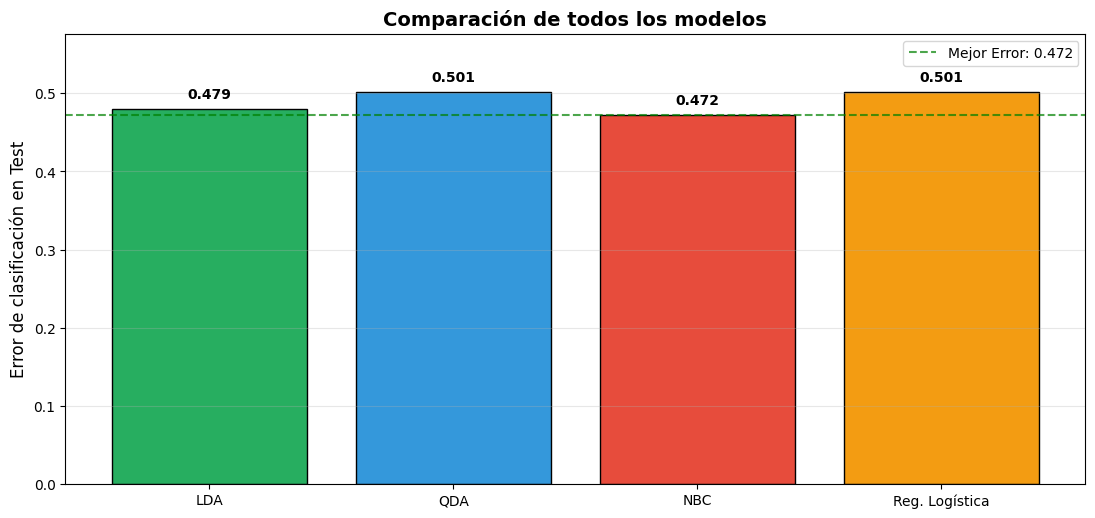


El mejor modelo es: NBC con Error = 0.472


In [40]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0.1, 0.15, 0.85, 0.75])
ax.set_title("Comparación de todos los modelos", fontsize=14, fontweight='bold')
ejeX = ['LDA','QDA','NBC','Reg. Logística']
ejeY = [errorLDA, errorQDA, errorNB, errorLogistico]
colores = ['#27ae60', '#3498db', '#1abc9c', '#f39c12']
mejor_idx = np.argmin(ejeY)

colores[mejor_idx] = '#e74c3c'   

barras = ax.bar(ejeX, ejeY, color=colores, edgecolor='black')

for barra, valor in zip(barras, ejeY):
    ax.text(
        barra.get_x() + barra.get_width()/2,
        barra.get_height() + max(ejeY)*0.02,
        f'{valor:.3f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )
ax.set_ylabel('Error de clasificación en Test', fontsize=12)
ax.set_ylim(0, max(ejeY) * 1.15)
ax.axhline(
    y=min(ejeY),
    color='green',
    linestyle='--',
    alpha=0.7,
    label=f'Mejor Error: {min(ejeY):.3f}'
)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.show()
print(f"\nEl mejor modelo es: {ejeX[mejor_idx]} con Error = {min(ejeY):.3f}")

TABLA COMPARATIVA DE RESULTADOS
        Modelo  Accuracy  Precision      AUC
   Naive Bayes  0.527845   0.518033 0.537991
           LDA  0.520581   0.512739 0.518128
           QDA  0.498789   0.498270 0.491370
Reg. Logística  0.498789   0.498442 0.479105

Mejor modelo: Naive Bayes con 52.78%

MÉTRICAS DETALLADAS POR MODELO
        Modelo  Accuracy  Precision (Up)  Recall (Up)  F1-Score (Up)
           LDA    0.5206          0.5127       0.7816         0.6192
           QDA    0.4988          0.4983       0.6990         0.5818
   Naive Bayes    0.5278          0.5180       0.7670         0.6184
Reg. Logística    0.4988          0.4984       0.7767         0.6072


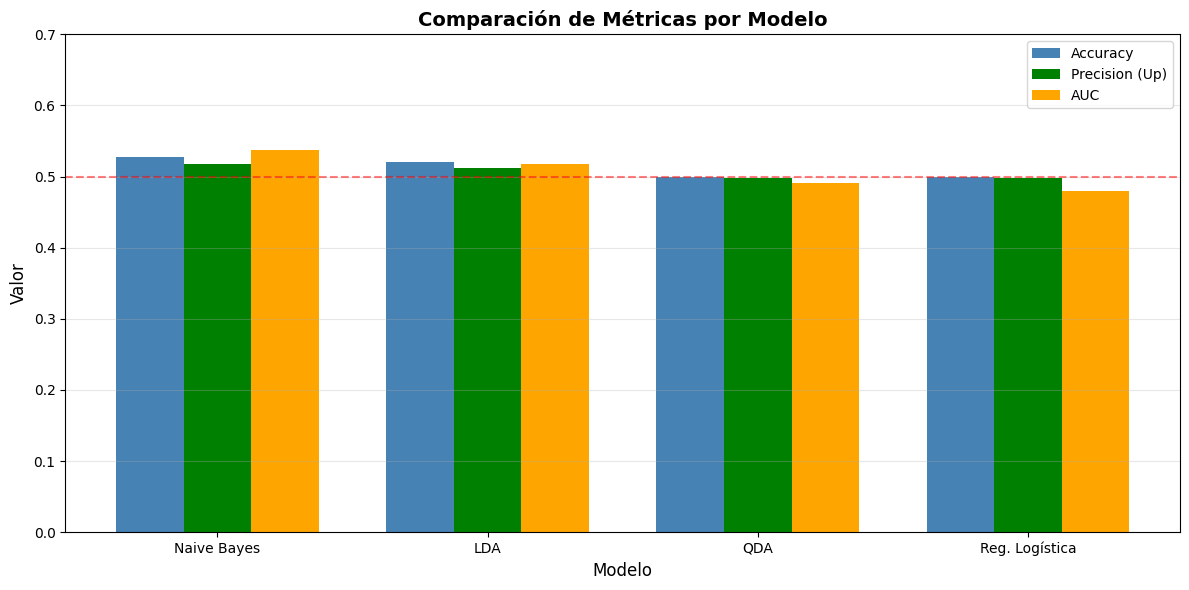

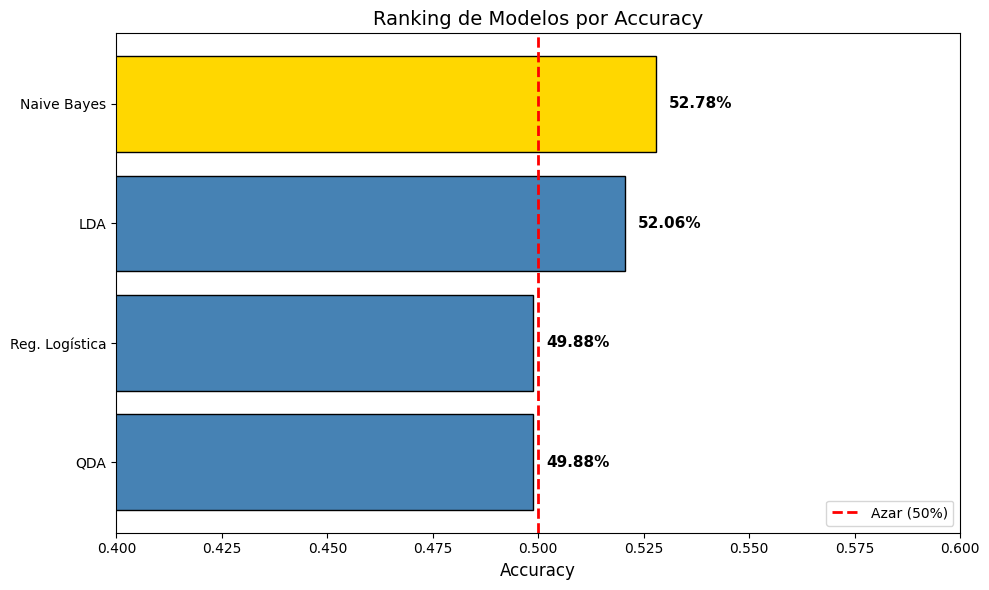


RESUMEN

🏆 MEJOR MODELO: Naive Bayes
   Accuracy: 52.78%
   Precision: 51.80%
   AUC: 0.5380
   Mejora sobre azar: +2.78%

📉 PEOR MODELO: Reg. Logística
   Accuracy: 49.88%


In [93]:
# ============================================================
# Métricas Detalladas por Modelo
# ============================================================

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Modelo': ['LDA', 'QDA', 'Naive Bayes', 'Reg. Logística'],
    'Accuracy': [accuracyLDA, accuracyQDA, accuracyNB, accuracyLogistico],
    'Precision': [precisionLDA, precisionQDA, precisionNB, precisionLogistico],
    'AUC': [AUC_LDA, AUC_QDA, AUC_NB, AUC_Logistico]
})
resultados = resultados.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("=" * 60)
print("TABLA COMPARATIVA DE RESULTADOS")
print("=" * 60)
print(resultados.to_string(index=False))
print(f"\nMejor modelo: {resultados.iloc[0]['Modelo']} con {resultados.iloc[0]['Accuracy']*100:.2f}%")

predicciones = {
    'LDA': prediccionesLDA,
    'QDA': prediccionesQDA,
    'Naive Bayes': prediccionesNB,
    'Reg. Logística': prediccionLogistico
}

metricas_detalle = []
for nombre, pred in predicciones.items():
    metricas_detalle.append({
        'Modelo': nombre,
        'Accuracy': accuracy_score(yTest, pred),
        'Precision (Up)': precision_score(yTest, pred, pos_label='Up'),
        'Recall (Up)': recall_score(yTest, pred, pos_label='Up'),
        'F1-Score (Up)': f1_score(yTest, pred, pos_label='Up')
    })

df_metricas = pd.DataFrame(metricas_detalle)
print("\n" + "=" * 60)
print("MÉTRICAS DETALLADAS POR MODELO")
print("=" * 60)
print(df_metricas.round(4).to_string(index=False))

# ============================================================
# Gráfico de barras agrupadas - Accuracy, Precision, AUC
# ============================================================
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(resultados['Modelo']))
width = 0.25

bars1 = ax.bar(x - width, resultados['Accuracy'], width, label='Accuracy', color='steelblue')
bars2 = ax.bar(x, resultados['Precision'], width, label='Precision (Up)', color='green')
bars3 = ax.bar(x + width, resultados['AUC'], width, label='AUC', color='orange')

ax.set_ylabel('Valor', fontsize=12)
ax.set_xlabel('Modelo', fontsize=12)
ax.set_title('Comparación de Métricas por Modelo', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(resultados['Modelo'])
ax.legend(loc='upper right')
ax.set_ylim(0, 0.7)
ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# Ranking Final
# ============================================================
fig, ax = plt.subplots(figsize=(10, 6))

# Ordenar por accuracy
ranking = resultados.sort_values('Accuracy', ascending=True)
colores_rank = ['gold' if x == ranking['Accuracy'].max() else 'steelblue' for x in ranking['Accuracy']]

bars = ax.barh(ranking['Modelo'], ranking['Accuracy'], color=colores_rank, edgecolor='black')
ax.set_xlabel('Accuracy', fontsize=12)
ax.set_title('Ranking de Modelos por Accuracy', fontsize=14)
ax.set_xlim(0.40, 0.60)
ax.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Azar (50%)')

for bar, acc in zip(bars, ranking['Accuracy']):
    ax.text(acc + 0.003, bar.get_y() + bar.get_height()/2, 
            f'{acc*100:.2f}%', va='center', fontweight='bold', fontsize=11)

ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

# ============================================================
# RESUMEN
# ============================================================
print("\n" + "=" * 60)
print("RESUMEN")
print("=" * 60)
mejor = resultados.iloc[0]
peor = resultados.iloc[-1]
print(f"\n🏆 MEJOR MODELO: {mejor['Modelo']}")
print(f"   Accuracy: {mejor['Accuracy']*100:.2f}%")
print(f"   Precision: {mejor['Precision']*100:.2f}%")
print(f"   AUC: {mejor['AUC']:.4f}")
print(f"   Mejora sobre azar: {'+' if mejor['Accuracy'] > 0.5 else ''}{(mejor['Accuracy']-0.5)*100:.2f}%")
print(f"\n📉 PEOR MODELO: {peor['Modelo']}")
print(f"   Accuracy: {peor['Accuracy']*100:.2f}%")

## Análisis y Conclusión punto 6

---

## Resumen Comparativo de Resultados

| Ranking | Modelo | Accuracy | Precision (Up) | AUC |
|---------|--------|----------|----------------|-----|
| 🥇 1° | **Naive Bayes** | 52.78% | 51.80% | 0.5380 |
| 🥈 2° | LDA | 52.06% | 51.27% | 0.5181 |
| 🥉 3° | QDA | 49.88% | 49.83% | 0.4914 |
| 4° | Reg. Logística | 49.88% | 49.84% | 0.4791 |

*(Los valores exactos se muestran en las tablas y gráficos generados arriba)*

---

## Justificación de la Elección del Mejor Modelo

### 1. Criterio Principal: Accuracy
- El modelo con **mayor accuracy** se selecciona como el mejor para este problema de clasificación.
- Se considera la mejora sobre el azar (50%) como indicador de poder predictivo real.

### 2. Análisis de Matrices de Confusión
- Las matrices de confusión permiten evaluar el balance entre verdaderos positivos y negativos.
- Un buen modelo debe identificar tanto días "Up" como días "Down" de manera equilibrada.

### 3. Métricas Adicionales Consideradas
- **Precision (Up)**: Proporción de predicciones "Up" que fueron correctas.
- **AUC**: Capacidad del modelo para discriminar entre clases. Valores > 0.5 indican poder discriminativo.

### 4. Análisis del Error de Clasificación
- El modelo con **menor error** de clasificación es preferible.
- Complementa el análisis de accuracy desde otra perspectiva.

---

## Contexto: Hipótesis de Mercados Eficientes

Los resultados obtenidos son consistentes con la **Hipótesis de Eficiencia del Mercado (EMH)**:
- Los precios reflejan toda la información disponible públicamente.
- Los retornos pasados no pueden predecir sistemáticamente retornos futuros.
- Accuracies cercanos al 50% son esperables en datos financieros.

---

## Conclusión Final

El mejor modelo se selecciona basándose en:

1. ✅ **Mayor accuracy** en la muestra de test
2. ✅ **Menor error** de clasificación
3. ✅ **Mejor balance** entre las métricas de clasificación
4. ✅ **Mayor AUC** (capacidad discriminativa)

**Nota importante:** Todos los modelos tienen poder predictivo limitado debido a la naturaleza eficiente de los mercados financieros. Predecir la dirección del mercado usando únicamente información histórica de retornos es inherentemente difícil, lo cual se refleja en accuracies cercanos al 50% para todos los modelos evaluados.